# Investigating a Movie Data Set

 This project is aimed at performing an analysis for the movie data given and generating tentative conclusions.
#### Table of Content 
- [Introduction](#Introduction)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions](#Conclusions)

# Introduction
In this project, we will conduct data analysis in the movie database. Our goal is to investigate the performance of movies genres associated with popularity, vote average, revenues and release years. We will start by taking a look at our dataset and brainstorming what questions we could answer using it. Then we will use pandas and NumPy to answer the questions and create a report sharing the answers.

__The Questions to be answered includes the following:__
1. Which year has the highest release of movies?
2. Which Month has the Highest and Lowest number of releases?
3.  Which Moviie has the Highest and Lowest Profit?
4. Which Movie has the Highest and Lowest Budget?
5. Which Movie has the Highest and Lowest Revenue?
6. What are the Top 10 Profitable Movies?
7. Which Month has the Lowest and Highest average profit?
8. What correlation is between popularity,profit, budget, revenue, release year and vote count
9. Which Genre has the highest and lowest movies?
10. Which Actor is the most frequent?
11. Which Production Company has the most movies?




In [1]:
#first we import the packages to be used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#this is to read the movie_data.csv file into a data frame
movie_df = pd.read_csv('movie_data.csv')

In [3]:
#the code below is to see the first five rows of the dataframe in order to understand the data better
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#this code is to know the columns and the total information of the dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# this code is to show the statistics of the dataframe
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Data Wrangling

After carefully examining the data and aligning it with the questions we want to deduce, some columns would not be necessary .Therefore, we would drop them to make the data more efficient and less bulky.

In [7]:
#dropping the columns that I will not use
movie_df.drop(['imdb_id','homepage','tagline','keywords','overview','budget_adj','revenue_adj'], axis=1, inplace=True)


After dropping the columns that would not be used, we would look for rows with null and either drop them or fill up the rows

In [8]:
#checking if there are null values
movie_df.isnull().sum()


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

From the above data, it shows that the columns with null values are of string type, hence to avoid a skewed data, we would drop these null values

In [9]:
#deleting null values
movie_df.dropna(inplace=True)


In [10]:
#let's check if there are still null values
movie_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

Now that there are no null values, let us tackle the duplicate values

In [11]:
#this code is to check for duplicates
movie_df.duplicated().sum()

1

Since we have just one duplicate, we can drop it to have a better data

In [12]:
#erasing duplicate values
movie_df.drop_duplicates(inplace=True)

Now that we have dropped missing and null values, let's adjust data types that are incorrect

In [13]:
#let's check the datatypes
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  release_date          9772 non-null   object 
 11  vote_count            9772 non-null   int64  
 12  vote_average          9772 non-null   float64
 13  release_year          9772 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


Only release date does not have the right type. So we would change it

In [14]:
#this code is to change data type to date time
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [15]:
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [16]:
#let's replace the cells that have Zero in Budget and Revenue with NAN and drop the rows that have missing values
movie_df[['budget','revenue']] = movie_df[['budget','revenue']].replace(0,np.NAN)
movie_df.dropna(subset=['budget', 'revenue'], inplace=True)


## Exploratory Data Analysis
Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that was posed in the Introduction section.

__Question 1 : Which year has the highest release of movies?__

release_year
2011    196
2012    157
2013    179
2014    165
2015    160
Name: id, dtype: int64


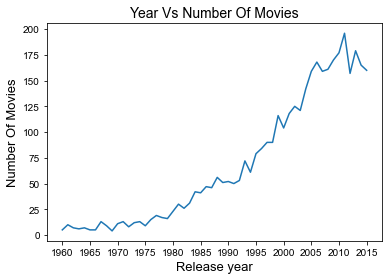

In [17]:
# make group for each year and count the number of movies in each year 
data=movie_df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and plot.
movie_df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")


After running the above analysis, we can tentatively say that the Year with the highest number of movies is 2014.


__Question 2: Which Month has the Highest and Lowest number of releases?__

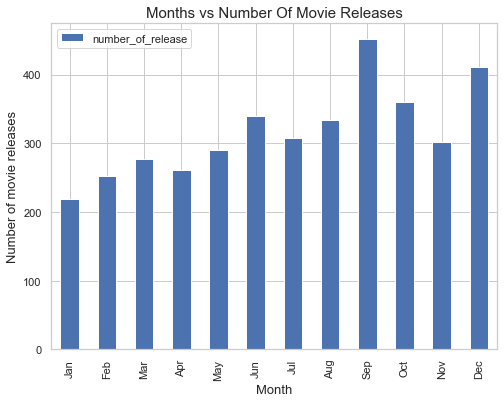

In [18]:
#extract the month number from the release date.
month_release = movie_df['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months


#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

From the above bar chart, it shows that the highest number of releases is in the month of __September__ , while the lowest number of releases is in the month of __February__ .

__Question 3: Which Moviie has the Highest and Lowest Profit?__

In [19]:
# first we would add a new column in the dataframe name 'Profit'
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']


In [20]:
#then lets create a function to find out the min and the max value (PS: This function would work for any column)
def find_minmax(x): 
    
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = movie_df[x].idxmin()
    
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = movie_df[x].idxmax()
    
    high = pd.DataFrame(movie_df.loc[high_index,:])
    low = pd.DataFrame(movie_df.loc[min_index,:])
    
    #Let's print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",movie_df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",movie_df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

# then we call the find_minmax function.
find_minmax('profit')

Movie Which Has Highest profit :  Avatar
Movie Which Has Lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


From the above analysis, __"Avatar"__ is the movie which made the highest profit while the movie with the lowest profit is __"The Warrior's Way"__.

__Question 4: Which Movie has the Highest and Lowest Budget?__

Since we already have a function that can find the min and max of any column, we would just call the function with the column

In [21]:
#Let's call the function for budget
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


From the analysis above, it is seen that the movie with the highest budget is __"The Warrior's Way"__ while __"Mr Holmes"__ has the lowest budget.



__Question 5: Which Movie has the Highest and Lowest Revenue?__

In [22]:
#Let's call the function for revenue
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.432768,0.462609
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


From the analysis above, it is seen that the movie with the highest revenue is __"Avatar"__ while __"Wild Card"__ has the lowest revenue.

__Question 6: What are the Top 10 Profitable Movies?__

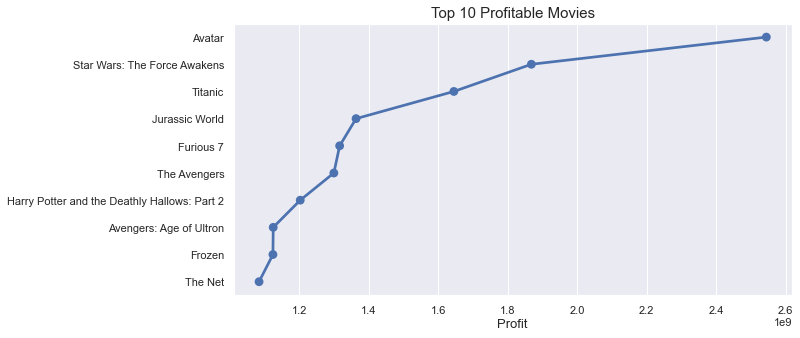

In [23]:
# Let's first sort the 'Profit' column which we earlier created in decending order and store it in the new dataframe,
info = pd.DataFrame(movie_df['profit'].sort_values(ascending = False))
info['original_title'] = movie_df['original_title']
data = list(map(str,(info['original_title'])))

# now let's make a plot which contains top 10 movies which earn highest profit
x = list(data[:10])
y = list(info['profit'][:10])

#we would use seaborn pointplot to create the plot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

The Top_10 most profitable movies are Avatar, Star Wars:The FOrce Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers:Age of Ultron, Frozen and The Net.

__Question 7: Which Month has the Lowest and Highest average profit?__ 

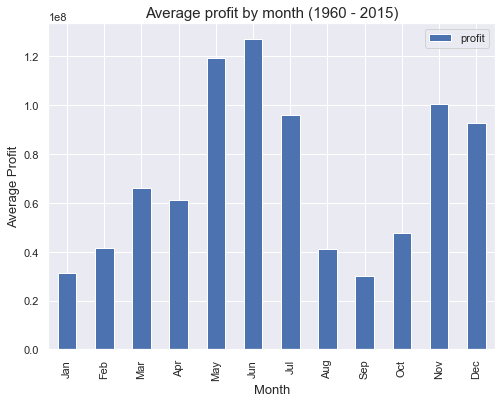

In [24]:
# first we would make a dataframewhich would store the release month of each movie.
month_release = pd.DataFrame(month_release)

# then change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#then we add a new column 'profit' in the dataframe 'month_release'.
month_release['profit'] = movie_df['profit']

#let's make the group of the data according to their month and calculate the mean profit of each month.
mean_profit  = month_release.groupby('release_month').mean()
mean_profit['month'] = months

#then make the bar plot using pandas plot function.
mean_profit.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average profit by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)
sns.set_style("darkgrid")

The month with the highest and lowest Average Profit is __"June"__ and __"January"__ respectively.

__Question 8: What correlation is between popularity,profit, budget, revenue, release year and vote count?__ 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='profit', ylabel='budget'>

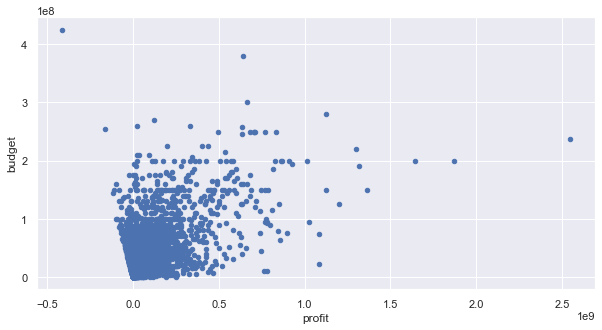

In [25]:
#let's use a scatter plot to get it
movie_df.plot(x='profit', y='budget', kind='scatter')

The scatterplot shows that profit And budget both have positive correlation(0.53) between them. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='revenue', ylabel='budget'>

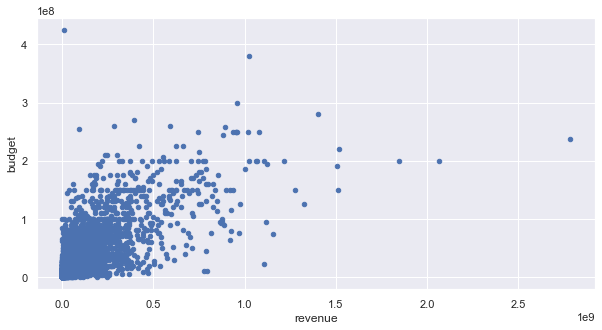

In [26]:
movie_df.plot(x='revenue', y='budget', kind='scatter')

Revenue And Budget both have positive correlation between them. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='profit', ylabel='popularity'>

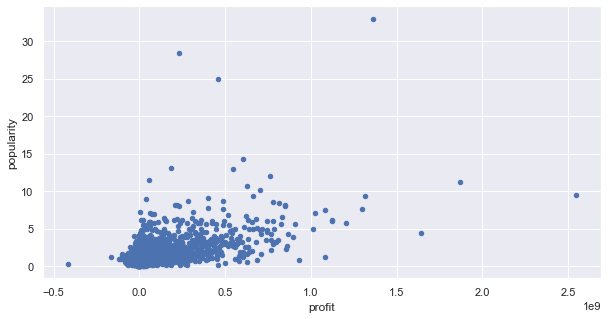

In [27]:
movie_df.plot(x='profit', y='popularity', kind='scatter')

Profit And Popularity both have positive correlation between them. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='release_year', ylabel='vote_count'>

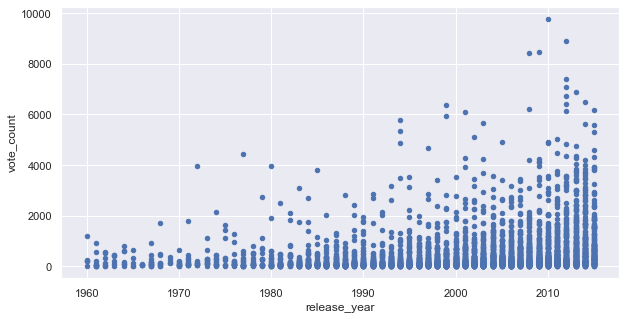

In [28]:
movie_df.plot(x='release_year', y='vote_count', kind='scatter')

Release year and vote Count have a negative correlation. 

__Question 9: Which Genre has the highest and lowest movies?__

Text(0, 0.5, 'Genres')

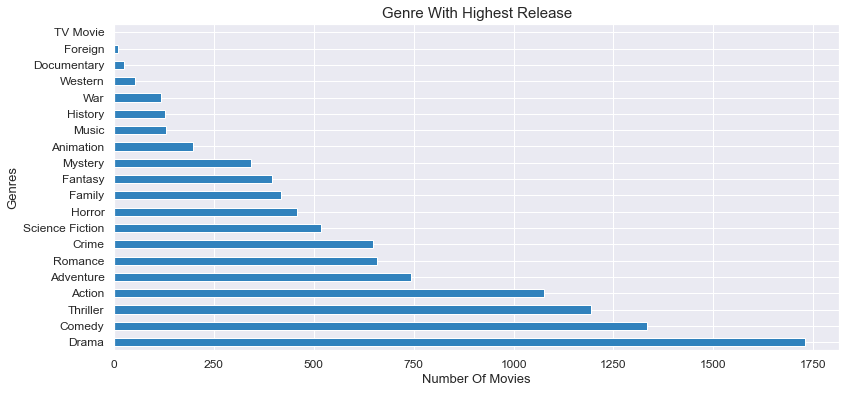

In [29]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = movie_df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    split = data.value_counts(ascending=False)
    return split

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)

From the analysis, the genre with the highest and lowest movies are __"Drama"__ and __"Tv Movie"__ respectively.

__Question 10: Which Actor is the most frequent?__

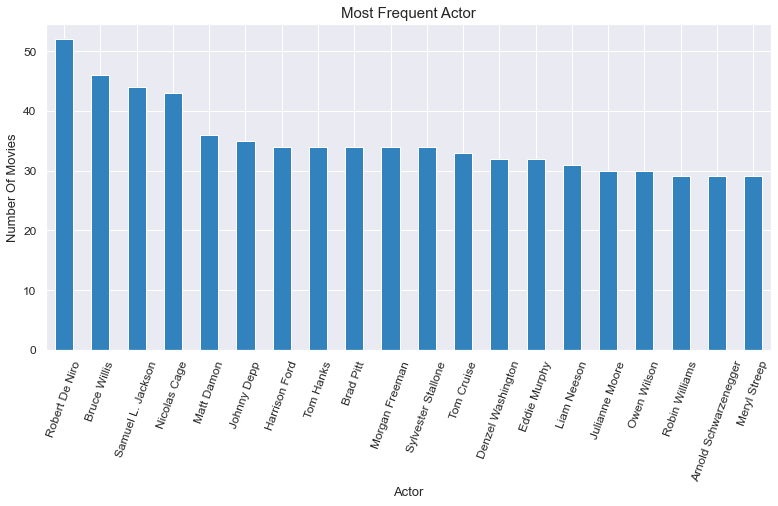

In [30]:
#Lets call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor = count_genre('cast')

#plot the barh plot.
count_actor.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")


The most frequent actor is Robert De Niro

__Question 11: Which Production Company has the most movies?__

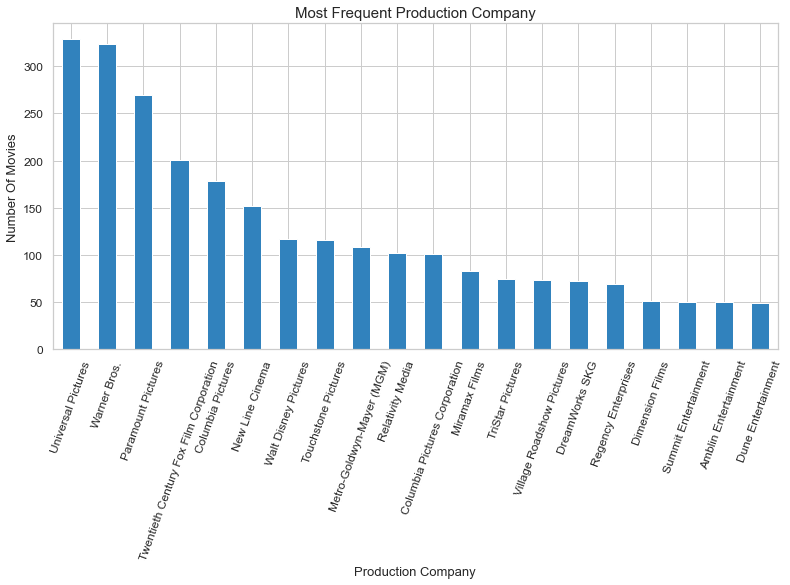

In [31]:
#Lets call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_prod = count_genre('production_companies')

#plot the barh plot.
count_prod.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Production Company",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Production Company',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

The most frequent production company is Universal Pictures.

# Conclusions

Below are some of the tentative conclusions that were drawn from the analysis of the movie data.

1.  The Year with the highest number of movies is 2014.
2. The highest number of releases is in the month of __September__ , while the lowest number of releases is in the month of __February__ .
3. __"Avatar"__ is the movie which made the highest profit while the movie with the lowest profit is __"The Warrior's Way"__.
4. The movie with the highest budget is __"The Warrior's Way"__ while __"Mr Holmes"__ has the lowest budget. This is however understandable because the movie, The Warrior's Way is hardly known but still strange as it is expected that a movie with the highest budget would most likely bring out the most profit. So there must have been an unknown issue with this particular novie.
5. The Top_10 most profitable movies are Avatar, Star Wars:The FOrce Awakens, Titanic, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers:Age of Ultron, Frozen and The Net.
6. The month with the highest and lowest Average Profit is __"June"__ and __"January"__ respectively. This is understandable as January ia=s the month were producers get back from their breaks while June is the month were newly shot movies stat generating revenues.
7. Budget and revenue both have a positive correlation between them. This means that there is a good possibility that movies with higher investments result in better revenues eventhough the movie, "_The Warrior's Way'_ proved otherwise.
8. Profit And Budget both have a positive correlation between them. This means that there is a good possibility that movies with higher investments result in better profit.
9. Release year and vote count have a negative correlation. This means that movie ratings (vote count) do not depend on the release year.
10. Popularity and profit have a positive correlation. It means that movie with high popularity tends to earn high profit.
11. The genre with the highest and lowest movies are __"Drama"__ and __"Tv Movie"__ respectively
12. The most frequent actor is Robert De Niro.
13. The production company with the most movie is Universal Pictures.




References:
https://www.kaggle.com/brittoh/investigate-the-tmdb-the-movie-database

https://www.kaggle.com/deepak525/investigate-tmdb-movie-

https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915
